# Import Libraries


In [39]:
import numpy as np
import string
from keras.utils import to_categorical
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.utils import pad_sequences

# Text Cleaning and converting into a list

The code opens the file 'Irish-lyrics-eof.txt' in read mode ('r') and reads its contents into the variable story_data. The with statement ensures that the file is properly closed after reading.
The clean_text function takes a text input and uses regular expressions to remove specific characters.
The final string is then split into a list of lines using the newline character as a delimiter, resulting in final_data. Each element of this list represents a cleaned line of text.



In [40]:
import re                                # Regular expressions to use sub function for replacing the useless text from the data

with open('Irish-lyrics-eof.txt') as story:
  story_data = story.read()

def clean_text(text):
  text = re.sub(r',', '', text)
  text = re.sub(r'\'', '',  text)
  text = re.sub(r'\"', '', text)
  text = re.sub(r'\(', '', text)
  text = re.sub(r'\)', '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'“', '', text)
  text = re.sub(r'”', '', text)
  text = re.sub(r'’', '', text)
  text = re.sub(r'\.', '', text)
  text = re.sub(r';', '', text)
  text = re.sub(r':', '', text)
  text = re.sub(r'\-', '', text)

  return text

# cleaning the data
lower_data = story_data.lower()           # Converting the string to lower case to get uniformity

split_data = lower_data.splitlines()      # Splitting the data to get every line seperately but this will give the list of uncleaned data

print(split_data)                         

final = '' 

for line in split_data:
  line = clean_text(line)
  final += '\n' + line

final_data = final.split('\n') 

['come all ye maidens young and fair', 'and you that are blooming in your prime', 'always beware and keep your garden fair', 'let no man steal away your thyme', 'for thyme it is a precious thing', 'and thyme brings all things to my mind', 'nlyme with all its flavours, along with all its joys', 'thyme, brings all things to my mind', 'once i and a bunch of thyme', 'i thought it never would decay', 'then came a lusty sailor', 'who chanced to pass my way', 'and stole my bunch of thyme away', 'the sailor gave to me a rose', 'a rose that never would decay', 'he gave it to me to keep me reminded', 'of when he stole my thyme away', 'sleep, my child, and peace attend thee', 'all through the night', 'guardian angels god will send thee', 'soft the drowsy hours are creeping', 'hill and dale in slumber sleeping', 'i my loving vigil keeping', 'while the moon her watch is keeping', 'while the weary world is sleeping', 'oer thy spirit gently stealing', 'visions of delight revealing', 'breathes a pure 

# Preprocessing Using Tokenizer

The tokenizer will only consider the top max_vocab most frequent words during the tokenization process. Words outside this range will be ignored.

In [41]:
max_vocab = 1000000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(final_data)

In [42]:
word2idx = tokenizer.word_index
print(len(word2idx))
print(word2idx)
vocab_size = len(word2idx) + 1        # Adding 1 to the vocab_size because the index starts from 1 not 0. This will make it uniform when using it further
print(vocab_size)

2702
{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'out': 66, 'fair': 67, 'this': 68, 'day': 69, 'town': 70, 'have': 71, 'can': 72, 'true': 73, 'its': 74, 'thou': 75, 'see': 76, 'dear': 77, 'more': 78, 'theres': 79, 'or': 80, 'had': 81, 'would': 82, 'over': 83, 'hear': 84, 'o': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 

# Converting words to tokens

In [58]:
input_seq = []

for line in final_data:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_seq = token_list[:i+1]
    input_seq.append(n_gram_seq)

print(input_seq)
print(len(input_seq))

[[51, 12], [51, 12, 95], [51, 12, 95, 1210], [51, 12, 95, 1210, 48], [51, 12, 95, 1210, 48, 2], [51, 12, 95, 1210, 48, 2, 67], [2, 11], [2, 11, 15], [2, 11, 15, 31], [2, 11, 15, 31, 355], [2, 11, 15, 31, 355, 8], [2, 11, 15, 31, 355, 8, 24], [2, 11, 15, 31, 355, 8, 24, 1211], [268, 788], [268, 788, 2], [268, 788, 2, 229], [268, 788, 2, 229, 24], [268, 788, 2, 229, 24, 570], [268, 788, 2, 229, 24, 570, 67], [116, 35], [116, 35, 117], [116, 35, 117, 789], [116, 35, 117, 789, 56], [116, 35, 117, 789, 56, 24], [116, 35, 117, 789, 56, 24, 183], [10, 183], [10, 183, 25], [10, 183, 25, 23], [10, 183, 25, 23, 5], [10, 183, 25, 23, 5, 571], [10, 183, 25, 23, 5, 571, 448], [2, 183], [2, 183, 790], [2, 183, 790, 12], [2, 183, 790, 12, 791], [2, 183, 790, 12, 791, 4], [2, 183, 790, 12, 791, 4, 7], [2, 183, 790, 12, 791, 4, 7, 230], [1212, 17], [1212, 17, 12], [1212, 17, 12, 74], [1212, 17, 12, 74, 1213], [1212, 17, 12, 74, 1213, 231], [1212, 17, 12, 74, 1213, 231, 17], [1212, 17, 12, 74, 1213, 231

In [44]:
max_seq_length = max(len(x) for x in input_seq)
print(max_seq_length)

16


In [45]:
input_seq = np.array(pad_sequences(input_seq, maxlen=max_seq_length, padding='pre'))
print(input_seq)

[[   0    0    0 ...    0   51   12]
 [   0    0    0 ...   51   12   95]
 [   0    0    0 ...   12   95 1210]
 ...
 [   0    0    0 ...    0   47  105]
 [   0    0    0 ...   47  105  136]
 [   0    0    0 ...  105  136  183]]


In [46]:
xs = input_seq[:, :-1]        # xs contains every word in sentence except the last one because we are using this value to predict the y value
labels = input_seq[:, -1]     # labels contains only the last word of the sentence which will help in hot encoding the y value in next step
print("xs: ",xs)
print("labels:",labels)

xs:  [[  0   0   0 ...   0   0  51]
 [  0   0   0 ...   0  51  12]
 [  0   0   0 ...  51  12  95]
 ...
 [  0   0   0 ...   0   0  47]
 [  0   0   0 ...   0  47 105]
 [  0   0   0 ...  47 105 136]]
labels: [  12   95 1210 ...  105  136  183]


In [47]:
from tensorflow.keras.utils import to_categorical

ys = to_categorical(labels, num_classes=vocab_size)
print(ys)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Training Data

•	The first layer is an Embedding layer, which transforms the input sequences of numerical indices into vectors of fixed size (embedding_dim). The vocabulary size is defined by vocab_size, and the input sequences are expected to have a maximum length of max_length.
•	Following the Embedding layer, an LSTM layer is applied as it is well suited for sequence processing task here. 50 units are set in this LSTM layer.
•	Subsequently, a Dense layer with vocab_size and ReLU activation is added for intermediate processing and feature extraction. It converts the network’s raw output into probabilities, making it suitable for predicting the next word in the sequence.


In [48]:
# model = Sequential()
# model.add(Embedding(vocab_size, 124, input_length=max_seq_length-1))
# model.add(Dropout(0.2))
# model.add(LSTM(520, return_sequences=True))
# model.add(Bidirectional(LSTM(340, return_sequences=True)))
# model.add(GlobalMaxPooling1D())
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(vocab_size, activation='softmax'))

model = Sequential()
model.add(Embedding(vocab_size, 124, input_length=max_seq_length-1))
model.add(LSTM(50))
model.add(Dense(vocab_size, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 124)           335172    
                                                                 
 lstm (LSTM)                 (None, 50)                35000     
                                                                 
 dense (Dense)               (None, 2703)              137853    
                                                                 
Total params: 508,025
Trainable params: 508,025
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [50]:
history = model.fit(xs,ys,epochs=100)

Epoch 1/100
375/375 [==============================] - 16s 26ms/step - loss: 6.7727 - accuracy: 0.0646
Epoch 2/100
375/375 [==============================] - 11s 28ms/step - loss: 6.3141 - accuracy: 0.0661
Epoch 3/100
375/375 [==============================] - 10s 28ms/step - loss: 6.2163 - accuracy: 0.0691
Epoch 4/100
375/375 [==============================] - 10s 26ms/step - loss: 6.1259 - accuracy: 0.0774
Epoch 5/100
375/375 [==============================] - 11s 29ms/step - loss: 6.0343 - accuracy: 0.0856
Epoch 6/100
375/375 [==============================] - 10s 27ms/step - loss: 5.9262 - accuracy: 0.0944
Epoch 7/100
375/375 [==============================] - 9s 25ms/step - loss: 5.8101 - accuracy: 0.1024
Epoch 8/100
375/375 [==============================] - 9s 24ms/step - loss: 5.6911 - accuracy: 0.1098
Epoch 9/100
375/375 [==============================] - 9s 23ms/step - loss: 5.5727 - accuracy: 0.1152
Epoch 10/100
375/375 [==============================] - 9s 23ms/step - loss:

375/375 [==============================] - 10s 26ms/step - loss: 1.5151 - accuracy: 0.6689
Epoch 81/100
375/375 [==============================] - 9s 24ms/step - loss: 1.4958 - accuracy: 0.6729
Epoch 82/100
375/375 [==============================] - 10s 26ms/step - loss: 1.4774 - accuracy: 0.6756
Epoch 83/100
375/375 [==============================] - 9s 24ms/step - loss: 1.4604 - accuracy: 0.6775
Epoch 84/100
375/375 [==============================] - 9s 24ms/step - loss: 1.4414 - accuracy: 0.6814
Epoch 85/100
375/375 [==============================] - 9s 24ms/step - loss: 1.4238 - accuracy: 0.6871
Epoch 86/100
375/375 [==============================] - 10s 27ms/step - loss: 1.4070 - accuracy: 0.6926
Epoch 87/100
375/375 [==============================] - 11s 29ms/step - loss: 1.3922 - accuracy: 0.6941
Epoch 88/100
375/375 [==============================] - 9s 24ms/step - loss: 1.3761 - accuracy: 0.6968
Epoch 89/100
375/375 [==============================] - 9s 24ms/step - loss: 1.359

In [52]:
full_model_filepath = 'full_model.h5'
model.save(full_model_filepath)

# Results

Below are the 2 plots of accuracy vs epoch and loss vs epoch

Text(0, 0.5, 'Loss')

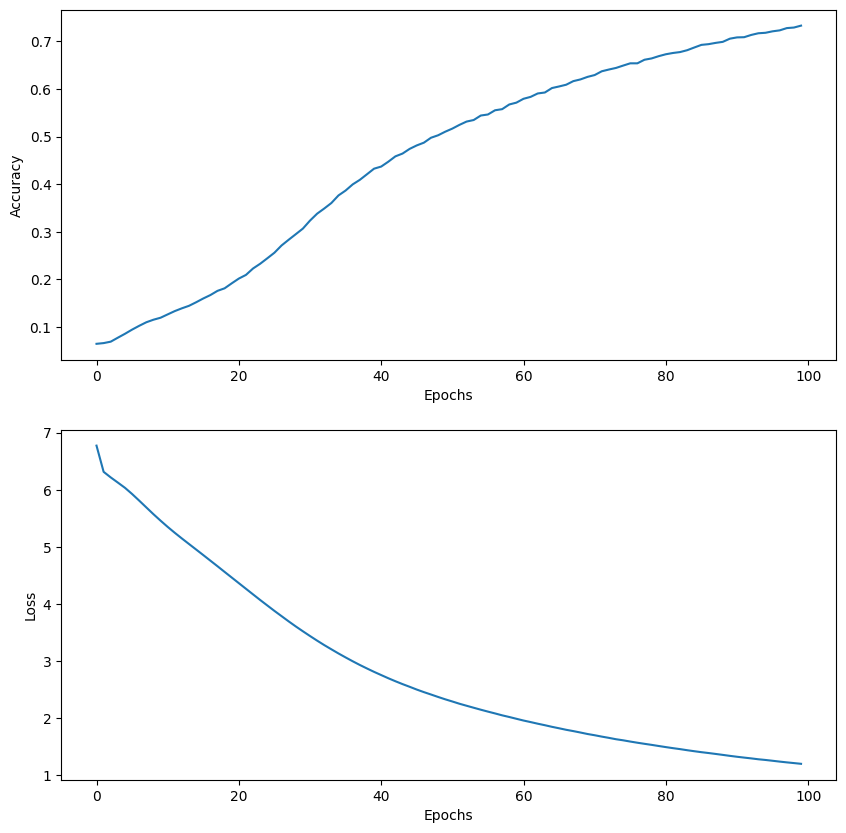

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Prediction

The predict_words function generates a sequence of predicted words given an initial seed using a trained language model. It utilizes the tokenizer to convert the seed into a sequence of tokens, pads the sequence, predicts the next word with the trained model, and appends the predicted word to the seed for a specified number of iterations (no_words).

In [54]:
def predict_words(seed, no_words):
  for i in range(no_words):
    token_list = tokenizer.texts_to_sequences([seed])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=1)

    new_word = ''

    for word, index in tokenizer.word_index.items():
      if predicted == index:
        new_word = word
        break
    seed += " " + new_word
  print(seed)

In [55]:
pred = predict_words('Come on', 10)

print(pred)

1/1 [==============================] - 0s 52ms/step
Come on the wild flowers that won be your darlin sportin road
None
